# Tutorial: Basic Definations and Settings

Measuring m/z values is the very elemental function of MS technologies, therefore the calculation of mass values for a peptide and its fragments becomes the most essential part in MS-based computational tools. AlphaBase calculates all mass values from atoms. And the masses of amino acids and modifications are calculated from their atom compositions, repectively. Eventually, the masses of peptides or precursors as well as their fragments can be calculated by the amino acid sequences with or without modifications (See figure below).

Calculating masses from atoms makes it much easier to switch between unlabeled and heavy-labeled peptides, as we did in Steller MS for 15N-labeled peptides as the reference for targeted proteomics (https://www.biorxiv.org/content/10.1101/2024.06.02.597029v2.full).

The other advantage of starting from atoms is that AlphaBase can calculate isotope distributions of peptides based on a pre-defined isotope distribution list of atoms (e.g., NIST atom table in https://physics.nist.gov/cgi-bin/Compositions/stand_alone.pl). The isotope information has been applied in our AlphaDIA search engine to boost the identification of DIA-MS data (https://www.biorxiv.org/content/10.1101/2024.05.28.596182v1).

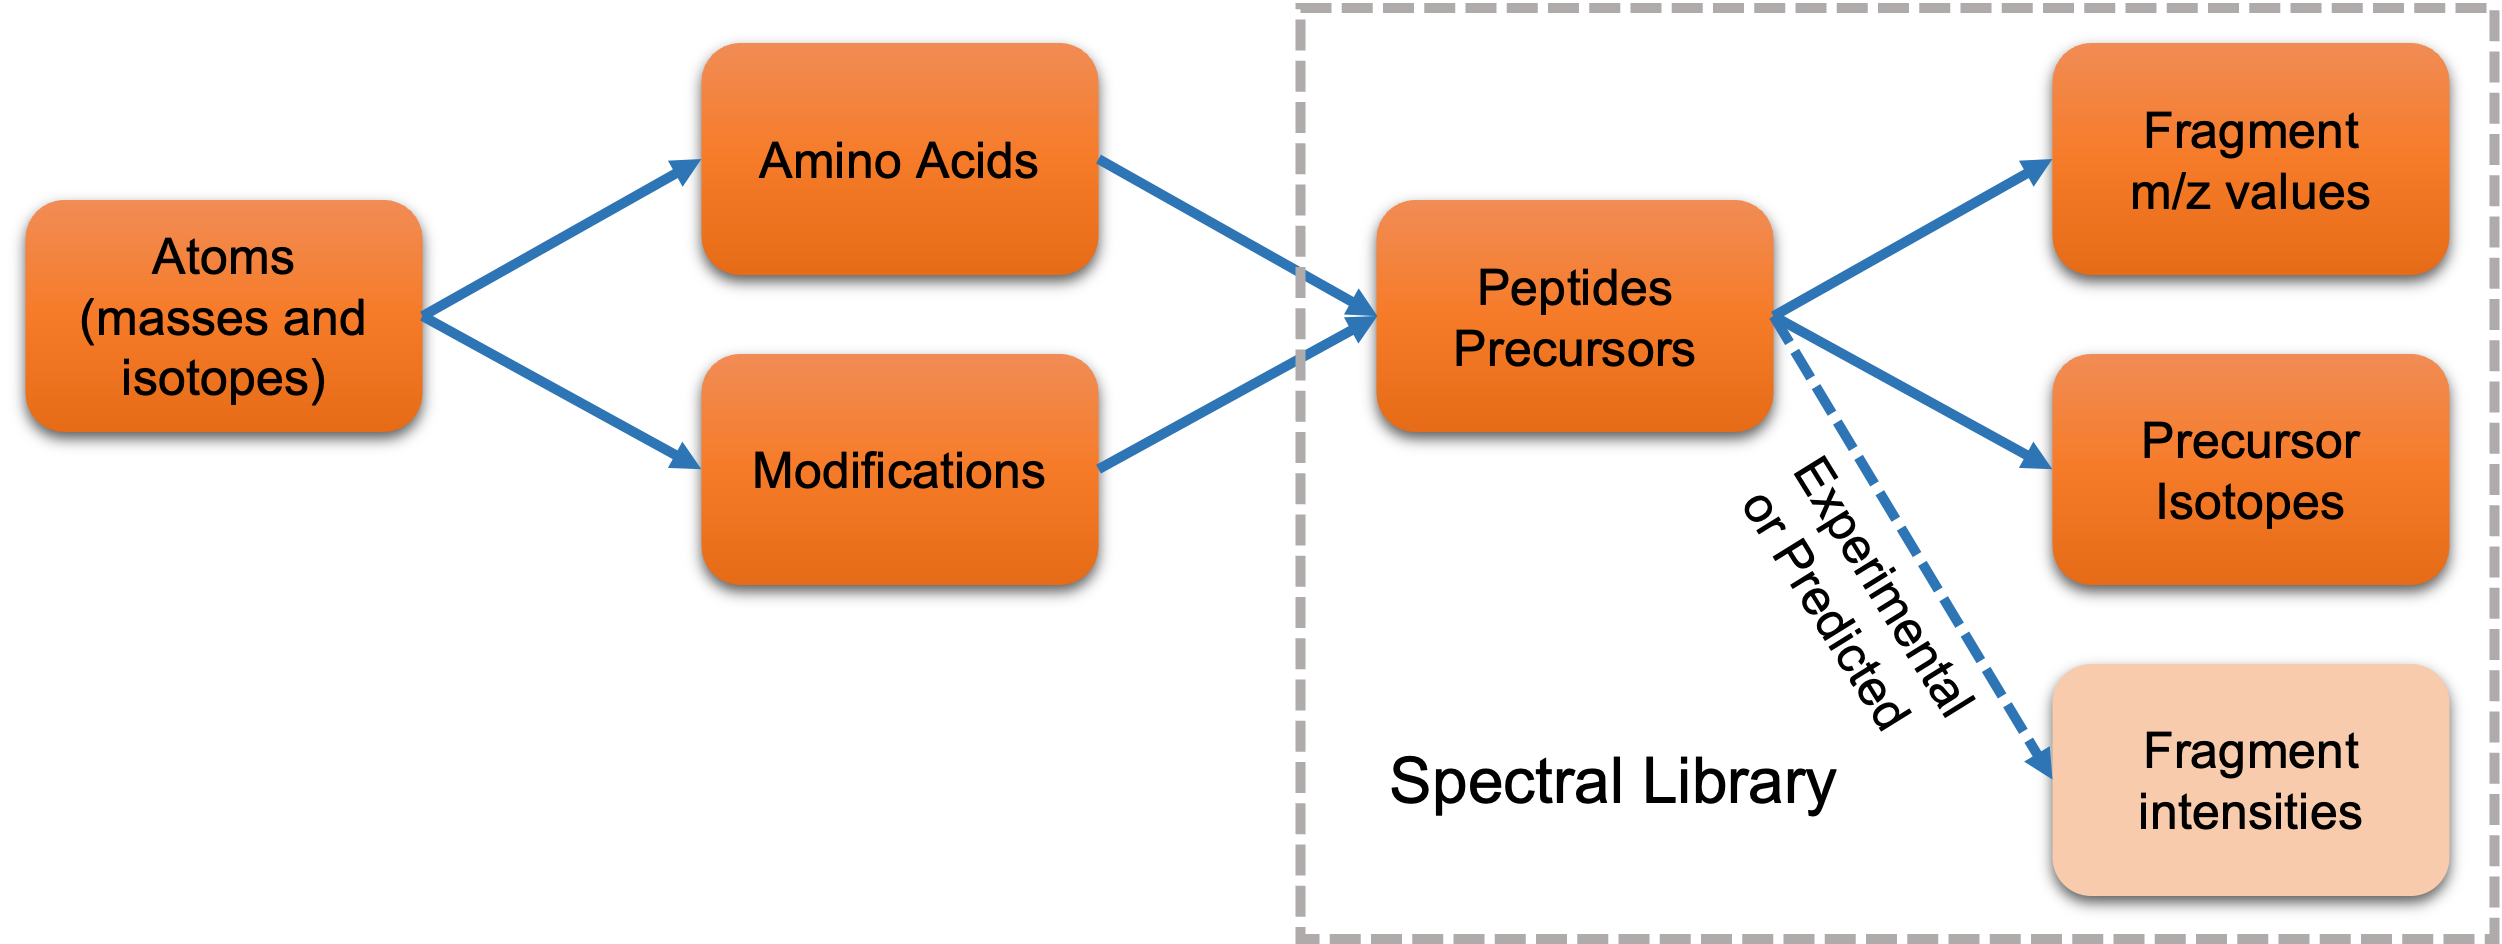

In [1]:
from IPython.display import Image
Image(filename='atom-to-peptides.png')

### Atoms/Elements

The masses of all amino acids and modifications are calculated from their atom compositions.

The atom information are defined in https://github.com/MannLabs/alphabase/blob/main/alphabase/constants/const_files/nist_element.yaml which is parsed from NIST, see https://github.com/MannLabs/alphabase/blob/main/scripts/nist_chem_to_yaml.ipynb.

After adding some heavy isotopes, including 13C, 15N, 2H, and 18O, we obtain 109 kinds of atoms:

In [2]:
import pandas as pd
from alphabase.constants.atom import CHEM_INFO_DICT
pd.DataFrame().from_dict(CHEM_INFO_DICT, orient='index')

,abundance,mass
13C,"[0.01, 0.99]","[12.0, 13.00335483507]"
14N,"[0.996337, 0.003663]","[14.00307400443, 15.00010889888]"
15N,"[0.01, 0.99]","[14.00307400443, 15.00010889888]"
18O,"[0.005, 0.005, 0.99]","[15.99491461957, 16.9991317565, 17.99915961286]"
2H,"[0.01, 0.99]","[1.00782503223, 2.01410177812]"
...,...,...
Xe,"[0.000952, 0.00089, 0.019102, 0.264006, 0.0407...","[123.905892, 125.9042983, 127.903531, 128.9047..."
Y,[1.0],[88.9058403]
Yb,"[0.00123, 0.02982, 0.1409, 0.2168, 0.16103, 0....","[167.9338896, 169.9347664, 170.9363302, 171.93..."
Zn,"[0.4917, 0.2773, 0.0404, 0.1845, 0.0061]","[63.92914201, 65.92603381, 66.92712775, 67.924..."


And their mono-isotopic mass are in `CHEM_MONO_MASS` (dict):

In [3]:
from alphabase.constants.atom import CHEM_MONO_MASS
pd.DataFrame().from_dict(CHEM_MONO_MASS, orient='index')

,0
13C,13.003355
14N,14.003074
15N,15.000109
18O,17.999160
2H,2.014102
...,...
Xe,131.904155
Y,88.905840
Yb,173.938866
Zn,63.929142


These atom masses are used to calculate the masses of amino acids, modifications, and then subsequent masses of peptides and fragments.

#### Commonly used molecular masses

In [4]:
from alphabase.constants.atom import (
    MASS_PROTON, MASS_ISOTOPE, MASS_NH3, MASS_H2O
)
MASS_PROTON, MASS_ISOTOPE, MASS_NH3, MASS_H2O

(1.007276467, 1.0033, 17.02654910112, 18.01056468403)

### Amino Acids

In [5]:
from alphabase.constants.aa import AA_DF
AA_DF.loc[ord('A'):ord('Z')]

,aa,formula,mass
65,A,C(3)H(5)N(1)O(1)S(0),7.103711e+01
66,B,C(1000000),1.200000e+07
67,C,C(3)H(5)N(1)O(1)S(1),1.030092e+02
68,D,C(4)H(5)N(1)O(3)S(0),1.150269e+02
69,E,C(5)H(7)N(1)O(3)S(0),1.290426e+02
70,F,C(9)H(9)N(1)O(1)S(0),1.470684e+02
71,G,C(2)H(3)N(1)O(1)S(0),5.702146e+01
72,H,C(6)H(7)N(3)O(1)S(0),1.370589e+02
73,I,C(6)H(11)N(1)O(1)S(0),1.130841e+02
74,J,C(6)H(11)N(1)O(1)S(0),1.130841e+02


In `AA_DF`, amino acids are encoded by ASCII (128 characters), thus 65==ord('A'), ..., 90==ord('Z'). Unicode strings can be fastly converted to ascii int32 values using `np.array.view()`:

In [6]:
import numpy as np

np.array(['ABCXYZ']).view(np.int32)

array([65, 66, 67, 88, 89, 90], dtype=int32)

But users does not need to know this, as we provided easy to use functionalities to get residue masses from sequences.

#### Calculate AA masses in batch

In [7]:
from alphabase.constants.aa import calc_AA_masses_for_same_len_seqs
calc_AA_masses_for_same_len_seqs(
    [
        'MACDEFG', 'MAKDEFG', 'MAKDEFR'
    ]
)

array([[131.04048509,  71.03711379, 103.00918496, 115.02694302,
        129.04259309, 147.06841391,  57.02146372],
       [131.04048509,  71.03711379, 128.09496302, 115.02694302,
        129.04259309, 147.06841391,  57.02146372],
       [131.04048509,  71.03711379, 128.09496302, 115.02694302,
        129.04259309, 147.06841391, 156.10111102]])

### Modifications

In AlphaBase, we used `mod_name@aa` to represent a modification, the `mod_name` is from UniMod. We also used `mod_name@Protein N-term`, `mod_name@Any N-term` and `mod_name@Any C-term` for terminal modifications, which follow the UniMod terminal name schema.

The default modification TSV is stored in `alphabase/constants/const_files/modification.tsv`, users can add more modifications into the tsv file (only `mod_name` and `composition` colums are required). Please https://github.com/MannLabs/alphabase/blob/main/alphabase/constants/const_files/modification.tsv.

In [8]:
from alphabase.constants.modification import MOD_DF
MOD_DF

,mod_name,unimod_mass,unimod_avge_mass,composition,unimod_modloss,modloss_composition,classification,unimod_id,modloss_importance,mass,modloss_original,modloss
mod_name,,,,,,,,,,,,
Acetyl@T,Acetyl@T,42.010565,42.0367,H(2)C(2)O(1),0.0,,Post-translational,1,0.0,42.010565,0.0,0.0
Acetyl@Protein N-term,Acetyl@Protein N-term,42.010565,42.0367,H(2)C(2)O(1),0.0,,Post-translational,1,0.0,42.010565,0.0,0.0
Acetyl@S,Acetyl@S,42.010565,42.0367,H(2)C(2)O(1),0.0,,Post-translational,1,0.0,42.010565,0.0,0.0
Acetyl@C,Acetyl@C,42.010565,42.0367,H(2)C(2)O(1),0.0,,Post-translational,1,0.0,42.010565,0.0,0.0
Acetyl@Any N-term,Acetyl@Any N-term,42.010565,42.0367,H(2)C(2)O(1),0.0,,Multiple,1,0.0,42.010565,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
TMTpro_zero@K,TMTpro_zero@K,295.189592,295.3773,H(25)C(15)N(3)O(3),0.0,,Chemical derivative,2017,0.0,295.189592,0.0,0.0
TMTpro_zero@T,TMTpro_zero@T,295.189592,295.3773,H(25)C(15)N(3)O(3),0.0,,Chemical derivative,2017,0.0,295.189592,0.0,0.0
Andro-H2O@C,Andro-H2O@C,332.198760,332.4339,H(28)C(20)O(4),0.0,,Chemical derivative,2025,0.0,332.198759,0.0,0.0


#### Modification sites

In alphabase, we use 0 and -1 to represent modification site of N-term and C-term, respectively. For other modification sites, we use 1 to n.

In [9]:
from alphabase.constants.modification import calc_modification_mass
sequence = 'MACDEFG'
mod_names = ['Acetyl@Any N-term', 'Carbamidomethyl@C']
mod_sites = [0,3]
calc_modification_mass(
    nAA=len(sequence),
    mod_names=mod_names,
    mod_sites=mod_sites
)

array([42.01056468,  0.        , 57.02146372,  0.        ,  0.        ,
        0.        ,  0.        ])

The modifications on the first amino acid and N-term will be added.

In [10]:
sequence = 'MAKDEFG'
mod_names = ['Acetyl@Any N-term', 'Oxidation@M']
mod_sites = [0,1]
calc_modification_mass(
    nAA=len(sequence),
    mod_names=mod_names,
    mod_sites=mod_sites
)

array([58.0054793,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ])

Multiple modification at a single site is supported, for example, in the following example, `K3` contains both `GlyGly@K` and `Dimethyl@K`:

In [11]:
sequence = 'MAKDEFR'
mod_names = ['GlyGly@K', 'Dimethyl@K']
mod_sites = [3,3]
calc_modification_mass(
    nAA=len(sequence),
    mod_names=mod_names,
    mod_sites=mod_sites
)

array([  0.        ,   0.        , 142.07422757,   0.        ,
         0.        ,   0.        ,   0.        ])

#### Caculate modification masses in batch

In [12]:
from alphabase.constants.modification import calc_mod_masses_for_same_len_seqs
calc_mod_masses_for_same_len_seqs(
    nAA=7,
    mod_names_list=[
        ['Acetyl@Any N-term', 'Carbamidomethyl@C'],
        ['Acetyl@Any N-term', 'Oxidation@M'],
        ['GlyGly@K', 'Dimethyl@K'],
    ],
    mod_sites_list=[
        [0, 3],
        [0, 1],
        [3, 3],
    ]
)

array([[ 42.01056468,   0.        ,  57.02146372,   0.        ,
          0.        ,   0.        ,   0.        ],
       [ 58.0054793 ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        , 142.07422757,   0.        ,
          0.        ,   0.        ,   0.        ]])

### Mass calculation functionalities

#### Calculate AA and modification masses in batch

In [13]:
from alphabase.constants.aa import calc_AA_masses_for_same_len_seqs
from alphabase.constants.modification import calc_mod_masses_for_same_len_seqs
mod_masses = calc_mod_masses_for_same_len_seqs(
    nAA=7,
    mod_names_list=[
        ['Acetyl@Any N-term', 'Carbamidomethyl@C'],
        ['Acetyl@Any N-term', 'Oxidation@M'],
        ['GlyGly@K', 'Dimethyl@K'],
    ],
    mod_sites_list=[
        [0, 3],
        [0, 1],
        [3, 3],
    ]
)
aa_masses = calc_AA_masses_for_same_len_seqs(
    [
        'MACDEFG', 'MAKDEFG', 'MAKDEFR'
    ]
)
mod_masses+aa_masses

array([[173.05104977,  71.03711379, 160.03064868, 115.02694302,
        129.04259309, 147.06841391,  57.02146372],
       [189.04596439,  71.03711379, 128.09496302, 115.02694302,
        129.04259309, 147.06841391,  57.02146372],
       [131.04048509,  71.03711379, 270.16919059, 115.02694302,
        129.04259309, 147.06841391, 156.10111102]])

#### np.cumsum to get b-ion neutral masses

In [14]:
import numpy as np
np.cumsum(aa_masses+mod_masses, axis=1)

array([[ 173.05104977,  244.08816356,  404.11881224,  519.14575526,
         648.18834835,  795.25676227,  852.27822599],
       [ 189.04596439,  260.08307818,  388.17804119,  503.20498422,
         632.24757731,  779.31599122,  836.33745494],
       [ 131.04048509,  202.07759887,  472.24678946,  587.27373248,
         716.31632557,  863.38473949, 1019.48585051]])

#### Mass functionalities in 'mass_calc'

The functionalities for peptide and fragment neutral masses have been implement in `alphabase.peptide.mass_calc`:

In [15]:
from alphabase.peptide.mass_calc import calc_peptide_masses_for_same_len_seqs

peptide_masses = calc_peptide_masses_for_same_len_seqs(
    ['MACDEFG', 'MAKDEFG', 'MAKDEFR'],
    mod_list=[
        'Acetyl@Any N-term;Carbamidomethyl@C',
        'Acetyl@Any N-term;Oxidation@M',
        'GlyGly@K;Dimethyl@K',
    ],
)
peptide_masses

array([ 870.28879067,  854.34801962, 1037.49641519])

In [16]:
from alphabase.peptide.mass_calc import calc_b_y_and_peptide_masses_for_same_len_seqs
b_masses, y_masses, peptide_masses = calc_b_y_and_peptide_masses_for_same_len_seqs(
    ['MACDEFG', 'MAKDEFG', 'MAKDEFR'],
    mod_list=[
        ['Acetyl@Any N-term', 'Carbamidomethyl@C'],
        ['Acetyl@Any N-term', 'Oxidation@M'],
        ['GlyGly@K', 'Dimethyl@K'],
    ],
    site_list=[
        [0, 3],
        [0, 1],
        [3, 3],
    ],
)
peptide_masses

array([ 870.28879067,  854.34801962, 1037.49641519])

In [17]:
b_masses

array([[173.05104977, 244.08816356, 404.11881224, 519.14575526,
        648.18834835, 795.25676227],
       [189.04596439, 260.08307818, 388.17804119, 503.20498422,
        632.24757731, 779.31599122],
       [131.04048509, 202.07759887, 472.24678946, 587.27373248,
        716.31632557, 863.38473949]])

In [18]:
y_masses

array([[697.2377409 , 626.20062711, 466.16997843, 351.14303541,
        222.10044232,  75.0320284 ],
       [665.30205523, 594.26494145, 466.16997843, 351.14303541,
        222.10044232,  75.0320284 ],
       [906.45593011, 835.41881632, 565.24962574, 450.22268271,
        321.18008962, 174.11167571]])

### Isotope distribution

`alphabase.constants.isotope.IsotopeDistribution` will calculate the isotope distribution and the mono-isotopic idx in the distribution for a given atom composition. 

What is the mono-isotopic idx (mono_idx)? For an atom, the `mono_idx` points to the highest abundance isotope, so the value is `round(mass of highest isotope - mass of first isotope)`.

In [19]:
import pandas as pd
from alphabase.constants.atom import CHEM_INFO_DICT
atom_df = pd.DataFrame().from_dict(CHEM_INFO_DICT, orient='index')
def get_mono(masses_abundances):
    masses, abundances = masses_abundances
    return round(masses[np.argmax(abundances)]-masses[0])
atom_df['mono_idx'] = atom_df[['mass','abundance']].apply(
    get_mono, axis=1
)
atom_df

,abundance,mass,mono_idx
13C,"[0.01, 0.99]","[12.0, 13.00335483507]",1
14N,"[0.996337, 0.003663]","[14.00307400443, 15.00010889888]",0
15N,"[0.01, 0.99]","[14.00307400443, 15.00010889888]",1
18O,"[0.005, 0.005, 0.99]","[15.99491461957, 16.9991317565, 17.99915961286]",2
2H,"[0.01, 0.99]","[1.00782503223, 2.01410177812]",1
...,...,...,...
Xe,"[0.000952, 0.00089, 0.019102, 0.264006, 0.0407...","[123.905892, 125.9042983, 127.903531, 128.9047...",8
Y,[1.0],[88.9058403],0
Yb,"[0.00123, 0.02982, 0.1409, 0.2168, 0.16103, 0....","[167.9338896, 169.9347664, 170.9363302, 171.93...",6
Zn,"[0.4917, 0.2773, 0.0404, 0.1845, 0.0061]","[63.92914201, 65.92603381, 66.92712775, 67.924...",0


`mono_idx` of an atom composition refers to the sum of the `mono_idx` of all atoms. In AlphaBase, `alphabase.constants.isotope.IsotopeDistribution` calculate both isotope abundance and `mono_idx`. 

For example, `Fe`'s `mono_idx` is 2,

In [20]:
atom_df.loc['Fe']

abundance                 [0.05845, 0.91754, 0.02119, 0.00282]
mass         [53.93960899, 55.93493633, 56.93539284, 57.933...
mono_idx                                                     2
Name: Fe, dtype: object

So `C(1)Fe(1)`'s `mono_idx` is also 2:

In [21]:
from alphabase.constants.isotope import IsotopeDistribution, parse_formula
iso = IsotopeDistribution()
iso.calc_formula_distribution(
    [('C',1),('Fe',1)]
)

(array([5.78245850e-02, 6.25415000e-04, 9.07722322e-01, 3.07809450e-02,
        3.01655900e-03, 3.01740000e-05, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00]),
 2)

But `13C(1)Fe(1)`'s `mono_idx` should be 3:

In [22]:
iso.calc_formula_distribution(
    [('13C',1),('Fe',1)]
)

(array([5.845000e-04, 5.786550e-02, 9.175400e-03, 9.085765e-01,
        2.100630e-02, 2.791800e-03, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00]),
 3)

The `mono_idx` for most of the atom compositions is 0, no matter how big the compositions are.

In [23]:
from alphabase.constants.isotope import IsotopeDistribution, parse_formula
iso = IsotopeDistribution()

formula = 'C(100)H(100)O(50)Na(1)'
formula = parse_formula(formula)
formula

[('C', 100), ('H', 100), ('O', 50), ('Na', 1)]

> `mono` isotope is not the `highest` isotope!!!

In [24]:
dist, mono = iso.calc_formula_distribution(formula)
mono, dist.argmax(), dist

(0,
 1,
 array([2.98521241e-01, 3.31991573e-01, 2.13532938e-01, 1.00604878e-01,
        3.82856126e-02, 1.23872292e-02, 3.51773755e-03, 8.95830236e-04,
        2.07763024e-04, 4.43944472e-05]))

All these low-level functionalities have been integrated into DataFrame functionalities, see `tutorial_dev_dataframes.ipynb` or `Tutorial for Dev: Peptide and Fragment DataFrames`